In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Normal Equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

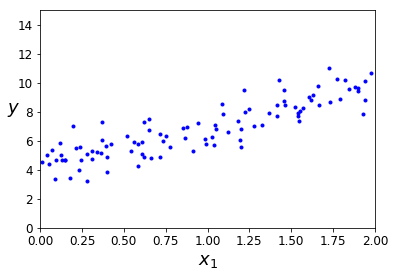

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X

array([[ 0.74908024],
       [ 1.90142861],
       [ 1.46398788],
       [ 1.19731697],
       [ 0.31203728],
       [ 0.31198904],
       [ 0.11616722],
       [ 1.73235229],
       [ 1.20223002],
       [ 1.41614516],
       [ 0.04116899],
       [ 1.9398197 ],
       [ 1.66488528],
       [ 0.42467822],
       [ 0.36364993],
       [ 0.36680902],
       [ 0.60848449],
       [ 1.04951286],
       [ 0.86389004],
       [ 0.58245828],
       [ 1.22370579],
       [ 0.27898772],
       [ 0.5842893 ],
       [ 0.73272369],
       [ 0.91213997],
       [ 1.57035192],
       [ 0.39934756],
       [ 1.02846888],
       [ 1.18482914],
       [ 0.09290083],
       [ 1.2150897 ],
       [ 0.34104825],
       [ 0.13010319],
       [ 1.89777107],
       [ 1.93126407],
       [ 1.6167947 ],
       [ 0.60922754],
       [ 0.19534423],
       [ 1.36846605],
       [ 0.88030499],
       [ 0.24407647],
       [ 0.99035382],
       [ 0.06877704],
       [ 1.8186408 ],
       [ 0.51755996],
       [ 1

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # Add x0 = 1 for each instance
X_b

array([[ 1.        ,  0.74908024],
       [ 1.        ,  1.90142861],
       [ 1.        ,  1.46398788],
       [ 1.        ,  1.19731697],
       [ 1.        ,  0.31203728],
       [ 1.        ,  0.31198904],
       [ 1.        ,  0.11616722],
       [ 1.        ,  1.73235229],
       [ 1.        ,  1.20223002],
       [ 1.        ,  1.41614516],
       [ 1.        ,  0.04116899],
       [ 1.        ,  1.9398197 ],
       [ 1.        ,  1.66488528],
       [ 1.        ,  0.42467822],
       [ 1.        ,  0.36364993],
       [ 1.        ,  0.36680902],
       [ 1.        ,  0.60848449],
       [ 1.        ,  1.04951286],
       [ 1.        ,  0.86389004],
       [ 1.        ,  0.58245828],
       [ 1.        ,  1.22370579],
       [ 1.        ,  0.27898772],
       [ 1.        ,  0.5842893 ],
       [ 1.        ,  0.73272369],
       [ 1.        ,  0.91213997],
       [ 1.        ,  1.57035192],
       [ 1.        ,  0.39934756],
       [ 1.        ,  1.02846888],
       [ 1.        ,

In [6]:
# Theta_best = inv(XTranspose . X) . XTranspose . y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[ 4.21509616],
       [ 2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

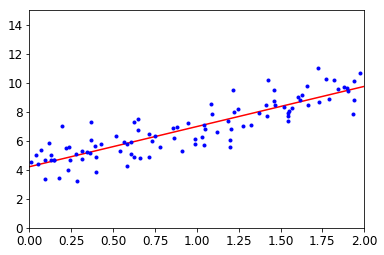

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Using Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(array([ 4.21509616]), array([[ 2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

## Gradient Descent

### Batch Gradient Descent

In [11]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 4.21509616],
       [ 2.77011339]])

In [12]:
X_new_b.dot(theta)

array([[ 4.21509616],
       [ 9.75532293]])

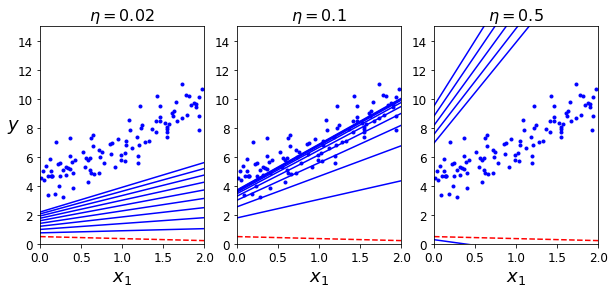

In [13]:

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### Stochastic Gradient Descent

In [14]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

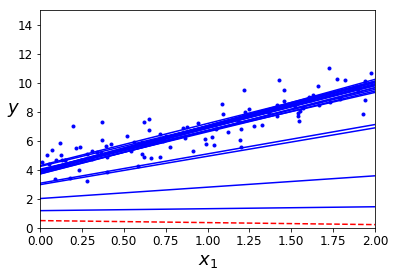

In [15]:
n_epochs = 50
t0, t1 = 5, 50 #Learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1) #Random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()                                      

In [16]:
theta

array([[ 4.21076011],
       [ 2.74856079]])